In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
#importing training data
training_data = pd.read_csv('1S-1X log.csv')
#Removing negatives
training_data = training_data[(training_data >= 0).all(axis=1)]
display(training_data)

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
9400,1524.0000,14.4538,54.8415,0.9607,0.1233,0.9879,1.0776,1.4853,0.4397,2.2471,1.2134,39.9174
9401,1524.1524,14.0887,55.8918,0.9660,0.1231,0.9906,1.0821,1.5206,0.4255,2.2587,1.1890,39.9393
9402,1524.3048,13.8190,57.2492,0.9624,0.1238,0.9823,1.0876,1.4323,0.4351,2.2589,1.1610,39.3027
9403,1524.4572,13.7363,58.0199,0.9399,0.1252,0.9660,1.0079,1.3148,0.4469,2.2546,1.1243,38.6237
9404,1524.6096,13.8716,58.2939,0.9146,0.1256,0.9360,1.0188,1.2740,0.4353,2.2515,1.0922,38.2129
...,...,...,...,...,...,...,...,...,...,...,...,...
23252,3635.0448,9.3138,115.5579,2.1824,0.0854,2.1704,2.5690,3.1694,0.2417,2.5226,2.6407,11.5939
23253,3635.1972,9.1831,115.3115,2.2141,0.0859,2.1827,2.5769,2.8899,0.2614,2.4981,2.6294,10.5358
23254,3635.3496,8.9994,114.8351,2.2159,0.0865,2.1733,2.5695,1.2580,0.2754,2.5023,2.6371,10.2207
23255,3635.5020,8.9888,115.0071,2.1779,0.0863,2.1579,2.5616,0.7530,0.2617,2.5252,2.6507,10.0463


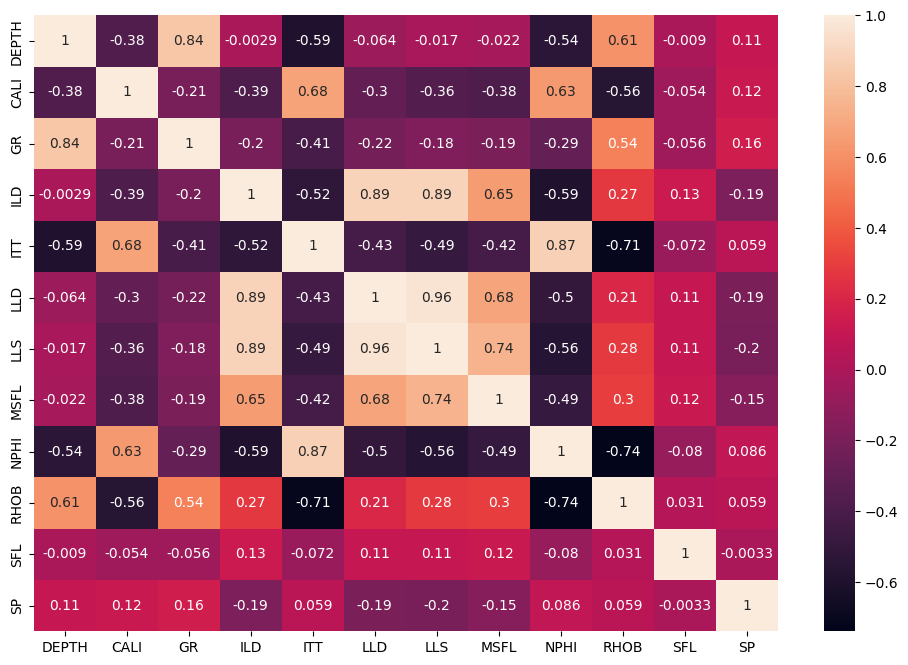

In [3]:
#generating heatmap
plt.figure(figsize=(12,8))
sns.heatmap(training_data.corr(), annot=True)
plt.show()

In [4]:
training_data

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
9400,1524.0000,14.4538,54.8415,0.9607,0.1233,0.9879,1.0776,1.4853,0.4397,2.2471,1.2134,39.9174
9401,1524.1524,14.0887,55.8918,0.9660,0.1231,0.9906,1.0821,1.5206,0.4255,2.2587,1.1890,39.9393
9402,1524.3048,13.8190,57.2492,0.9624,0.1238,0.9823,1.0876,1.4323,0.4351,2.2589,1.1610,39.3027
9403,1524.4572,13.7363,58.0199,0.9399,0.1252,0.9660,1.0079,1.3148,0.4469,2.2546,1.1243,38.6237
9404,1524.6096,13.8716,58.2939,0.9146,0.1256,0.9360,1.0188,1.2740,0.4353,2.2515,1.0922,38.2129
...,...,...,...,...,...,...,...,...,...,...,...,...
23252,3635.0448,9.3138,115.5579,2.1824,0.0854,2.1704,2.5690,3.1694,0.2417,2.5226,2.6407,11.5939
23253,3635.1972,9.1831,115.3115,2.2141,0.0859,2.1827,2.5769,2.8899,0.2614,2.4981,2.6294,10.5358
23254,3635.3496,8.9994,114.8351,2.2159,0.0865,2.1733,2.5695,1.2580,0.2754,2.5023,2.6371,10.2207
23255,3635.5020,8.9888,115.0071,2.1779,0.0863,2.1579,2.5616,0.7530,0.2617,2.5252,2.6507,10.0463


In [5]:
#selecting only features with low correlation
high = ['ILD', 'LLD','LLS','MSFL','SFL','SP', 'RHOB']
#dropping features with low correlation to retain those of high correlation
df_high = training_data.drop(high, axis=1)
df_rhob = training_data['RHOB']
x,y =df_high, df_rhob
df_high

,DEPTH,CALI,GR,ITT,NPHI
9400,1524.0000,14.4538,54.8415,0.1233,0.4397
9401,1524.1524,14.0887,55.8918,0.1231,0.4255
9402,1524.3048,13.8190,57.2492,0.1238,0.4351
9403,1524.4572,13.7363,58.0199,0.1252,0.4469
9404,1524.6096,13.8716,58.2939,0.1256,0.4353
...,...,...,...,...,...
23252,3635.0448,9.3138,115.5579,0.0854,0.2417
23253,3635.1972,9.1831,115.3115,0.0859,0.2614
23254,3635.3496,8.9994,114.8351,0.0865,0.2754
23255,3635.5020,8.9888,115.0071,0.0863,0.2617


In [6]:
#spliting
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Generating a model
reg = RandomForestRegressor()
#fit data into the regression model
reg.fit(X_train, y_train)
#Creating a prediction statement
RF_predictions = reg.predict(X_test)

In [7]:
from sklearn.metrics import r2_score

In [8]:
#root mean sq. error and R square value
RF_rmse = np.sqrt(mean_squared_error(y_test, RF_predictions))
r2= r2_score(y_test, RF_predictions)

In [9]:
print('Root mean square error',RF_rmse)
print('R square', r2)

Root mean square error 0.035490618022861506
R square 0.9107686574667321


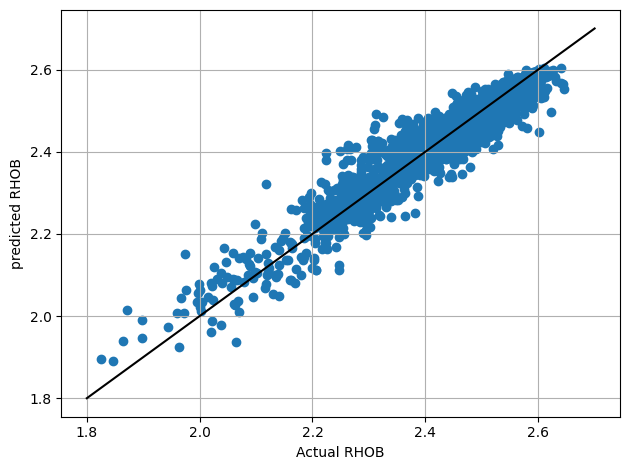

In [10]:
plt.scatter(y_test, RF_predictions)
plt.grid()
plt.plot((1.8, 2.7), (1.8, 2.7), 'black')
plt.ylabel('predicted RHOB')
plt.xlabel('Actual RHOB')

#display the figure
plt.tight_layout()
plt.show()

## Testing trained model in a different well

In [27]:

test_1 = pd.read_csv('1S-2X log.csv')
#Removing negatives
test_1 = test_1[(test_1 >= 0).all(axis=1)]
#selecting only features with low correlation
test_x = test_1.drop(high, axis=1)
test_1['rhob'] = reg.predict(test_x)


In [28]:
test_1

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP,rhob
9580,1581.9120,14.6117,72.3413,0.9733,0.1365,0.8844,1.0454,0.8075,0.4041,2.3035,0.9608,63.9524,2.253930
9581,1582.0644,15.1402,71.4789,0.9894,0.1349,0.9197,1.0387,0.6889,0.4176,2.3111,0.9698,63.8961,2.201368
9582,1582.2168,15.1520,71.2632,1.0084,0.1336,0.9416,1.0216,0.6483,0.4203,2.3133,0.9879,63.7820,2.201001
9583,1582.3692,14.8484,69.6416,1.0274,0.1324,0.9429,0.9988,0.6234,0.4107,2.3050,1.0063,63.6584,2.252294
9584,1582.5216,15.4542,68.1555,1.0387,0.1306,0.9288,0.9763,0.7767,0.4081,2.3296,1.0335,63.5299,2.182674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20896,3306.4704,12.6247,106.5361,2.5241,0.0870,1.9885,2.3306,2.9424,0.2441,2.6164,3.3535,74.8055,2.423738
20897,3306.6228,12.6271,104.1838,2.4460,0.0870,2.0045,2.3176,2.9974,0.2422,2.6269,3.0081,74.3804,2.444127
20898,3306.7752,12.6282,110.7324,2.3721,0.0870,2.0225,2.3032,3.0224,0.2389,2.6341,2.7091,73.8879,2.441161
20899,3306.9276,12.6273,115.5901,2.3395,0.0871,2.0349,2.2898,3.0355,0.2327,2.6251,2.4682,73.6399,2.438832


In [29]:
test_r2= r2_score(test_1['rhob'], test_1['RHOB'])
print('Root mean square', test_r2)

Root mean square -1.4085808932820014


## Explaination of negative root mean square
<p>
R squared is a measure of how well a model fits the data. R squared is negative when the model fits worse than a horizontal line12. This means that the model does not follow the trend of the data and has a large error. One way to get a negative R squared is to force the model to go through a specific point, such as by setting the intercept.</p>
<div>
<img src=r2_neg.png>
</div>

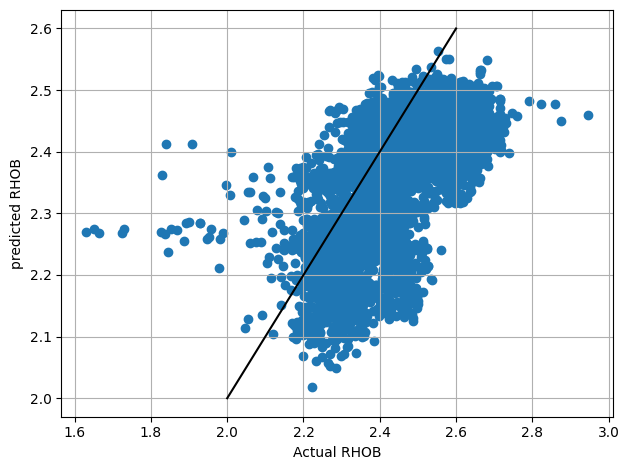

In [30]:
plt.scatter(test_1['RHOB'], test_1['rhob'])
plt.grid()
plt.plot((2, 2.6), (2, 2.6), 'black')
plt.ylabel('predicted RHOB')
plt.xlabel('Actual RHOB')

#display the figure
plt.tight_layout()
plt.show()

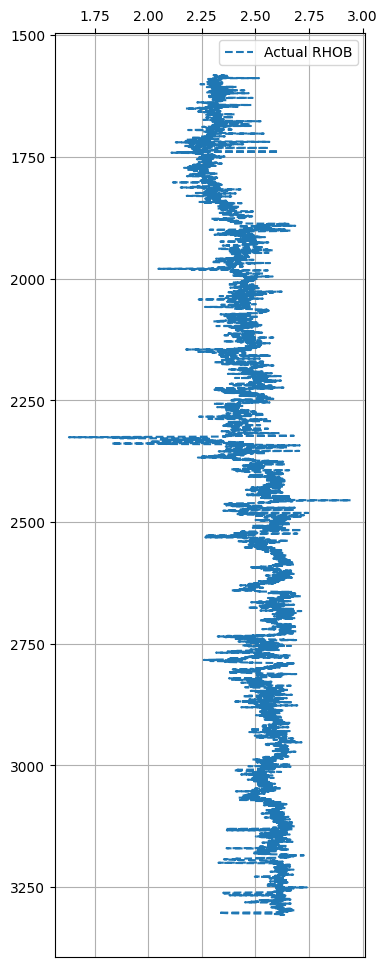

In [19]:
plt.figure(figsize=(4,12))
plt.plot(test_1['RHOB'],test_1['DEPTH'],'--', label = 'Actual RHOB')
#plt.plot(test_1['rhob'], test_1['DEPTH'], label = 'Predicted RHOB_RF')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.grid()
plt.legend()
plt.show()

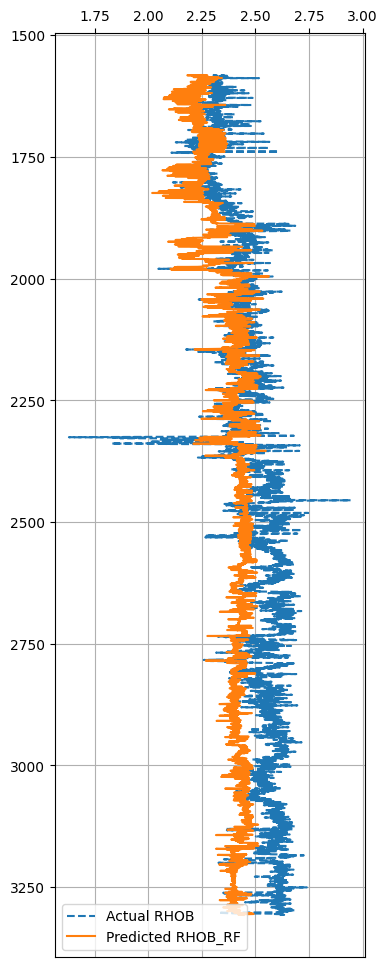

In [31]:
test_1 = pd.read_csv('1S-2X log.csv')
#Removing negatives
test_1 = test_1[(test_1 >= 0).all(axis=1)]
#selecting only features with high correlation
test_x = test_1.drop(high, axis=1)
test_y = test_1['RHOB']
test_1['rhob'] = reg.predict(test_x)

plt.figure(figsize=(4,12))
plt.plot(test_1['RHOB'],test_1['DEPTH'],'--', label = 'Actual RHOB')
plt.plot(test_1['rhob'], test_1['DEPTH'], label = 'Predicted RHOB_RF')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.grid()
plt.legend()
plt.show()

In [32]:
test_r2= r2_score(test_1['RHOB'], test_1['rhob'])
print('Root mean square', test_r2)

Root mean square -0.1640598486369398


## END OF CODE